In [5]:
# imdb 데이터 전처리
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_words = 10000
maxlen = 500
batch_size = 32

# imdb 데이터셋 로드(10000개 단어만 사용함)
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_words)

# 모든 텍스트 데이터 벡터의 dimension을 동일하게 만들기
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

print(input_train.shape)
print(input_test.shape)

(25000, 500)
(25000, 500)


In [12]:
# Embedding층과 SimpleRNN층을 이용한 모델 학습
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(SimpleRNN(32))
# 마지막 hidden state의 output값만 출력되고, 해당 ouput값이 sigmoid activation function에 들어간다. class가 두 개 밖에 없으니, activation function은 sigmoid이다.
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

history = model.fit(input_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 16s 105ms/step - loss: 0.6110 - acc: 0.6510 - val_loss: 0.5155 - val_acc: 0.7652
Epoch 2/10
157/157 [==============================] - 17s 110ms/step - loss: 0.3721 - acc: 0.8482 - val_loss: 0.3858 - val_acc: 0.8360
Epoch 3/10
157/157 [==============================] - 17s 110ms/step - loss: 0.2936 - acc: 0.8841 - val_loss: 0.3950 - val_acc: 0.8376
Epoch 4/10
157/157 [==============================] - 23s 148ms/step - loss: 0.2458 - acc: 0.9055 - val_loss: 0.3433 - val_acc: 0.8646
Epoch 5/10
157/157 [==============================] - 23s 147ms/step - loss: 0.1872 - acc: 0.9301 - val_loss: 0.3612 - val_acc: 0.8652
Epoch 6/10
157/157 [==============================] - 18s 113ms/step - loss: 0.1682 - acc: 0.9370 - val_loss: 0.4119 - val_acc: 0.8376
Epoch 7/10
157/157 [==============================] - 17s 111ms/step - loss: 0.1132 - acc: 0.9614 - val_loss: 0.4131 - val_acc: 0.8500
Epoch 8/10
157/157 [==============================] - 1

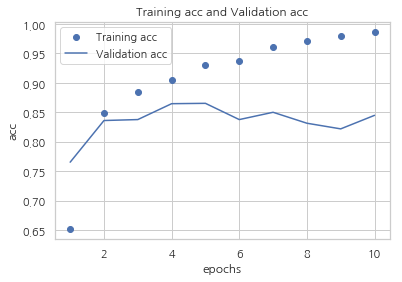

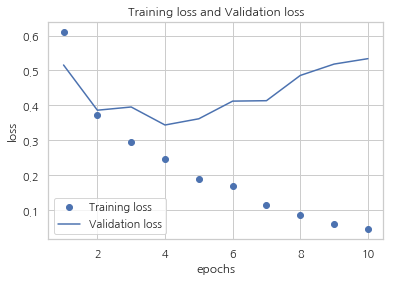

In [15]:
# 모델링 결과
%matplotlib inline

acc = history.history["acc"]
loss = history.history["loss"]
val_acc = history.history["val_acc"]
val_loss = history.history["val_loss"]

epochs = list(range(1, len(acc) + 1))

plt.title("Training acc and Validation acc")
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()

plt.figure()

plt.title("Training loss and Validation loss")
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

plt.show()